In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("pandas_project/heart-disease.csv")


    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [9]:
heart_disease["chol"][3]

236

In [221]:
heart_disease[heart_disease["target"]==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


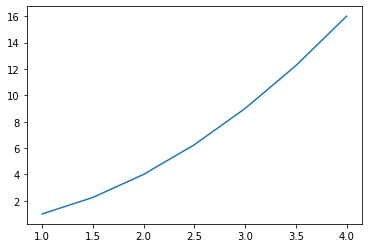

In [222]:
x = np.arange(1,4.5,.5)
x
plt.plot(x,x**2)

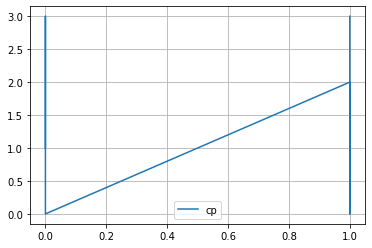

In [223]:
plt.plot(heart_disease["target"],heart_disease["cp"],label="cp")
plt.legend()
plt.grid()
#plt.show()


In [224]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [225]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,r2_score,plot_roc_curve,precision_score
from sklearn.neighbors import KNeighborsClassifier

In [226]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

In [228]:
models = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=500,max_depth=10),
    "LogisticRegression": LogisticRegression(C=.19,tol=.01 ),
    "KNeighborClassifier": KNeighborsClassifier(n_neighbors=10,algorithm="brute")
}
results = { }
def model_selector(model,Xtrain,ytrain):
    for name,i in model.items():
        i.fit(Xtrain,ytrain)
        results[name ] = i.score(X_test,y_test)
    return results

np.random.seed(42)

model_result = model_selector(model=models,Xtrain=X_train,ytrain=y_train)
model_result
    

C:\Users\CHUKWUEMEKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7868852459016393,
 'LogisticRegression': 0.8032786885245902,
 'KNeighborClassifier': 0.639344262295082}

In [231]:
plt.bar(model_result)

TypeError: bar() missing 1 required positional argument: 'height'

  ### RandomizedGridSearch

In [215]:
grid_knc = {
    "n_neighbors" : [6,7,9],
    "leaf_size" : [40,60,80],
           }


In [211]:
grid_rfc = {"n_estimators" : [200,300,1000],
            "max_depth" : [4,5,8],
            "min_samples_leaf" : [1,2,3]}
    

rfc_grid_srch = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions= grid_rfc,
                              n_iter=10,
                              cv=4,
                                   verbose= True
                     )
rfc_grid_srch.fit(X_train,y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 5, 8],
                                        'min_samples_leaf': [1, 2, 3],
                                        'n_estimators': [200, 300, 1000]},
                   verbose=True)

In [207]:
rfc_grid_srch.score(X_test,y_test)

0.8032786885245902

In [205]:
rfc_grid_srch.best_params_

{'n_estimators': 300, 'min_samples_leaf': 3, 'max_depth': 5}

In [216]:
knc_grid_sch = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=grid_knc,
                                 n_iter=20,
                                 random_state=10,
                                 cv=5,
                                 verbose= True)
knc_grid_sch.fit(X_train,y_train)

C:\Users\CHUKWUEMEKA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': [40, 60, 80],
                                        'n_neighbors': [6, 7, 9]},
                   random_state=10, verbose=True)

In [217]:
knc_grid_sch.score(X_test,y_test)

0.6065573770491803